#### Carnegie Mellon University - Tepper School of Business
#### 46-886 - Machine Learning Fundamentals
#### 22/23 - Mini 4 - Section M4 - Farahat
---

# Image Classification with (Convolutional) Neural Nets

This is code is largely adapted from Chapter 2 and 8 of the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Setting up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.datasets import mnist

## Loading the MNIST dataset in Keras

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

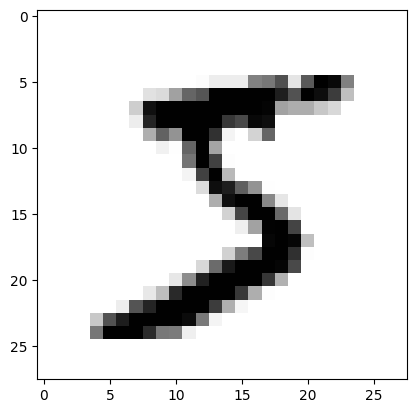

In [10]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Classification Tree Model

In [12]:
train_images_as_vectors = train_images.reshape((60000, 28 * 28))
#train_images = train_images.astype("float32") / 255
test_images_as_vectors = test_images.reshape((10000, 28 * 28))
#test_images = test_images.astype("float32") / 255

In [13]:
mod_CART = DecisionTreeClassifier(max_depth=4, random_state=886)

In [14]:
mod_CART.fit(train_images_as_vectors, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=886)

In [15]:
mod_CART_accuracy = mod_CART.score(test_images_as_vectors, test_labels)

In [16]:
print(f"test error rate of CART model: {(1-mod_CART.score(test_images_as_vectors, test_labels))*100}%")

test error rate of CART model: 40.43%


## Neural Network without Convolutional Layers

In [17]:
inputs = keras.Input(shape=(28*28,))

In [18]:
x = layers.Dense(100, activation="relu")(inputs)

In [19]:
outputs = layers.Dense(10, activation="softmax")(x)

In [20]:
mod_nn = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
mod_nn.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
#mod_nn.fit(train_images_as_vectors, train_labels, epochs=5, batch_size=64)
mod_nn.fit(train_images_as_vectors, train_labels)

1875/1875 [==============================] - 9s 4ms/step - loss: 2.8284 - accuracy: 0.8665


In [23]:
mod_nn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
test_loss, test_acc = mod_nn.evaluate(test_images_as_vectors, test_labels)
print(f"test error rate of NN without conv: {(1-test_acc)*100}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.9120
test error rate of NN without conv: 8.799999952316284%


## Neural Network with Convolutional Layers

In [25]:
inputs = keras.Input(shape=(28, 28, 1))

In [26]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

In [27]:
outputs = layers.Dense(10, activation="softmax")(x)

In [28]:
mod_nn_conv = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
mod_nn_conv.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
mod_nn_conv.fit(train_images, train_labels, epochs=1, batch_size=64)

938/938 [==============================] - 73s 77ms/step - loss: 0.3644 - accuracy: 0.9474


In [31]:
test_loss, test_acc = mod_nn_conv.evaluate(test_images, test_labels)
print(f"test error rate of convolutional NN: {(1-test_acc)*100}%")

313/313 [==============================] - 4s 11ms/step - loss: 0.0775 - accuracy: 0.9776
test error rate of convolutional NN: 2.240002155303955%


## Using Model to Make Predictions

In [32]:
prediction = mod_nn_conv.predict(test_images[0:1])
prediction

1/1 [==============================] - 0s 117ms/step


array([[1.74553065e-08, 3.03604836e-10, 3.54004333e-05, 2.27215696e-06,
        2.96004981e-14, 6.60860811e-11, 2.26510434e-13, 9.99962330e-01,
        3.03120107e-09, 1.21268515e-08]], dtype=float32)

In [33]:
prediction.argmax()

7

In [34]:
test_labels[0]

7

# END